In [1]:
from typing import TypedDict, Annotated

from dotenv import load_dotenv
from langchain.chat_models import init_chat_model
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from rich.console import Console

In [2]:
load_dotenv()
console = Console()

In [3]:
llm = init_chat_model("google_genai:gemini-2.5-flash", temperature=0.0)

# invoke the LLM
response = llm.invoke(
    "Name 5 freedom fighters, including male and female, from Maharashtra India (return a comma separated list of names only!)"
)
console.print(response)

/home/mjbhobe/code/git-projects/learning_langgraph/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AIMessage(
    content='Bal Gangadhar Tilak, Gopal Krishna Gokhale, Shivram Hari Rajguru, Savitribai Phule, Godavari 
Parulekar',
    additional_kwargs={},
    response_metadata={
        'prompt_feedback': {'block_reason': 0, 'safety_ratings': []},
        'finish_reason': 'STOP',
        'safety_ratings': []
    },
    id='run--506a9732-d52d-40a2-a093-57329a30880e-0',
    usage_metadata={
        'input_tokens': 25,
        'output_tokens': 30,
        'total_tokens': 1901,
        'input_token_details': {'cache_read': 0}
    }
)

In [4]:
class State(TypedDict):
    messages: Annotated[list, add_messages]


def chatbot(state: State) -> State:
    return {"messages": [llm.invoke(state["messages"])]}

In [5]:
# build our graph
builder = StateGraph(State)
builder.add_node("chatbot", chatbot)
# build edges: START -> chatbot -> END
builder.add_edge(START, "chatbot")
builder.add_edge("chatbot", END)
graph = builder.compile()

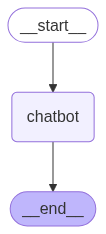

In [6]:
# display the graph
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [7]:
prompt: str = "Who was the first person to walk on the moon? Return just a name."

message = {"role": "user", "content": prompt}

# state = State(messages=[prompt])
response = graph.invoke({"messages": [message]})
console.print(response)

{
    'messages': [
        HumanMessage(
            content='Who was the first person to walk on the moon? Return just a name.',
            additional_kwargs={},
            response_metadata={},
            id='c9061fae-6d83-4eb3-9b81-445ecefcfb00'
        ),
        AIMessage(
            content='Neil Armstrong',
            additional_kwargs={},
            response_metadata={
                'prompt_feedback': {'block_reason': 0, 'safety_ratings': []},
                'finish_reason': 'STOP',
                'safety_ratings': []
            },
            id='run--15b15f19-fb15-44db-a699-cffc5f5222cb-0',
            usage_metadata={
                'input_tokens': 17,
                'output_tokens': 2,
                'total_tokens': 50,
                'input_token_details': {'cache_read': 0}
            }
        )
    ]
}

In [10]:
# this is a chat in loop
state: State = None
while True:
    #console.print("[green]You: [/green]", end="")
    in_message = input("You: ")

    if in_message.strip().lower() in ["exit", "quit", "bye"]:
        break

    if state is None:
        state: State = {"messages": [{"role": "user", "content": in_message}]}
    else:
        state["messages"].append({"role": "user", "content": in_message})

    state = graph.invoke(state)
    # console.print(f"[blue]Bot: [/blue] {state['messages'][-1].content}")
    print(f"Bot: {state['messages'][-1].content}")


Bot: Neil Armstrong
Bot: July 20, 1969
Bot: Apollo 11
Bot: Buzz Aldrin and Michael Collins
Bot: United States
